In [1]:
from pathlib import Path
import matplotlib.pyplot as plt

import avaread

normal_files = list(Path("../tests/test_files/").glob("*.raw8"))
sequence_files = list(Path("../tests/test_files/").glob("*.str8"))

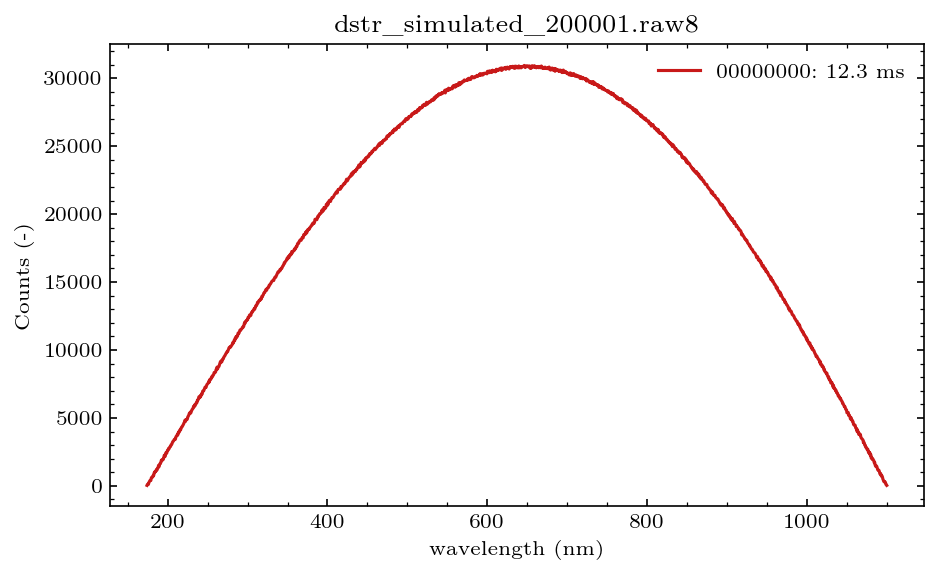

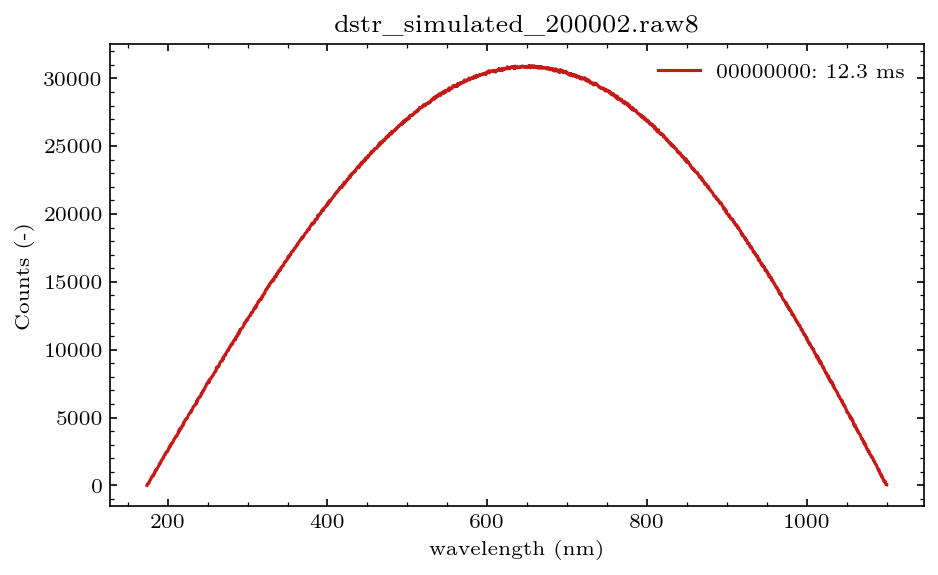

In [ ]:
for f in normal_files:
    file = avaread.read_file(f)
    plt.figure()
    plt.title(file.name)
    for channel in file:
        plt.plot(channel.wavelength, channel.signal, label=f"{channel.ID.SerialNumber}: {channel.exposure:.1f} ms")
    plt.legend()
    plt.xlabel("wavelength (nm)")
    plt.ylabel("Counts (-)")

In [ ]:
for f in sequence_files:
    file = avaread.read_file(f)
    fig, ax = plt.subplots(2, 1)
    ax[0].set_xlabel("wavelength (nm)")
    ax[1].set_xlabel("delay (ms)")
    fig.suptitle(f"{file.name}: exposure: {file.exposure:.2g} ms")
    for a in ax:
        a.set_ylabel("Counts (-)")

    for frame in file:
        ax[0].plot(file.wavelength, frame)

    ax[1].plot(file.delay, [frame.sum() for frame in file])
    fig.tight_layout()